# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
sns.set_theme(style='darkgrid')

In [4]:
df=pd.read_csv("C:\\Users\\Pritee\\OneDrive\\Documents\\data science assignments\\assignments\\clustering\\crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# hierarchial clustering

In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


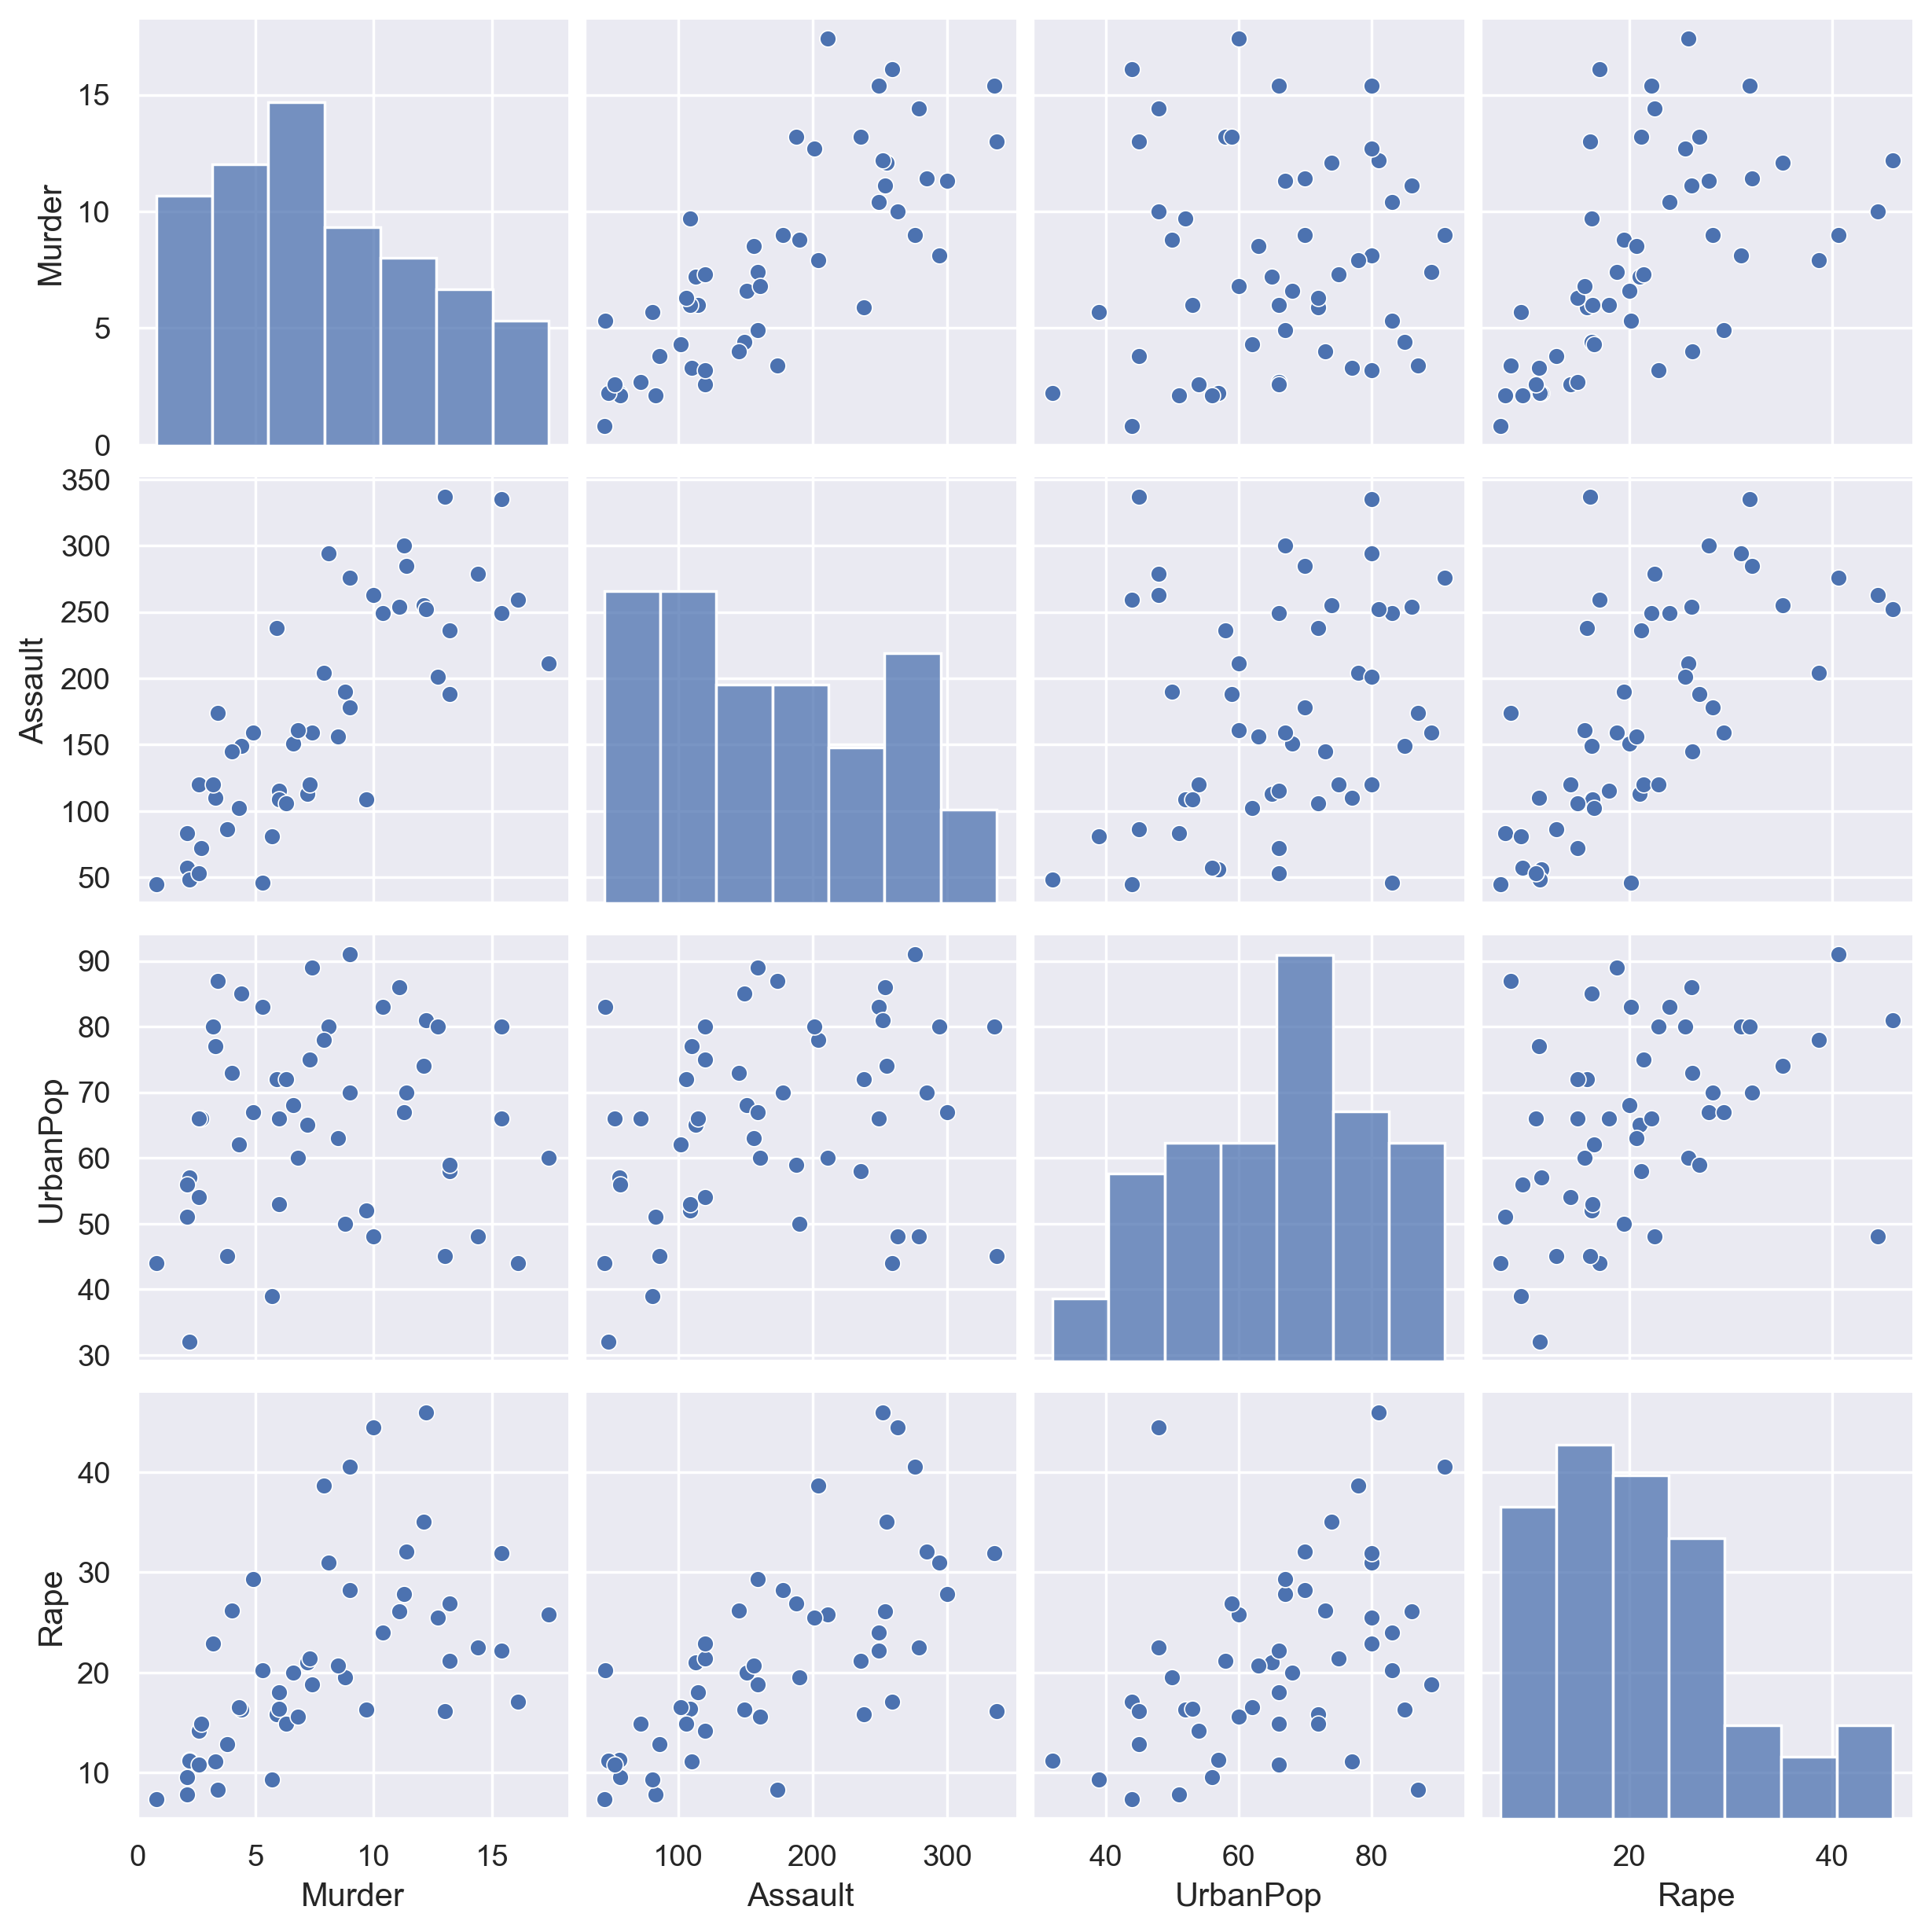

In [7]:
sns.pairplot(df)

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
#Dendrogram with single and complete linkage

In [10]:
from scipy.cluster import hierarchy

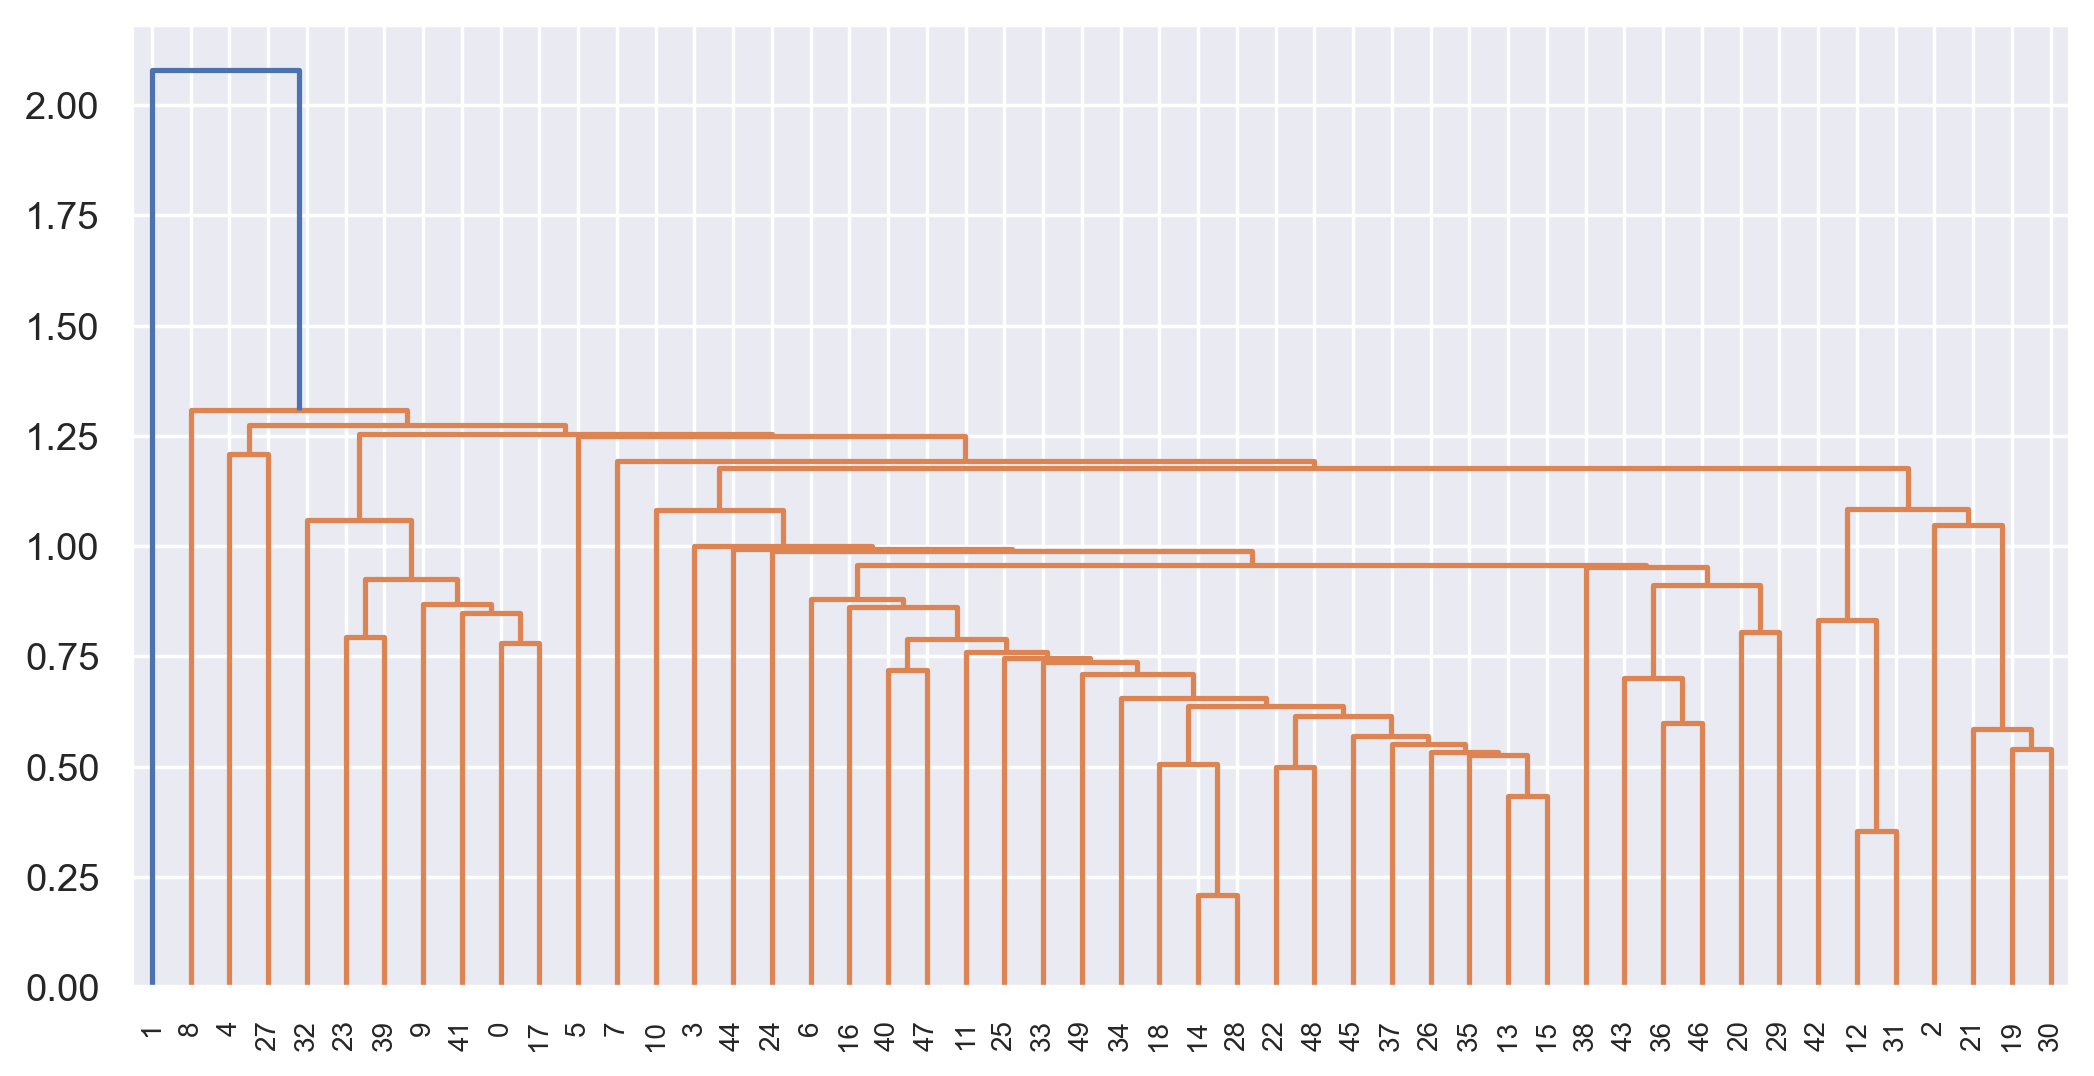

In [11]:
lk = hierarchy.linkage(x, method='single')
dendrogram = hierarchy.dendrogram(lk)

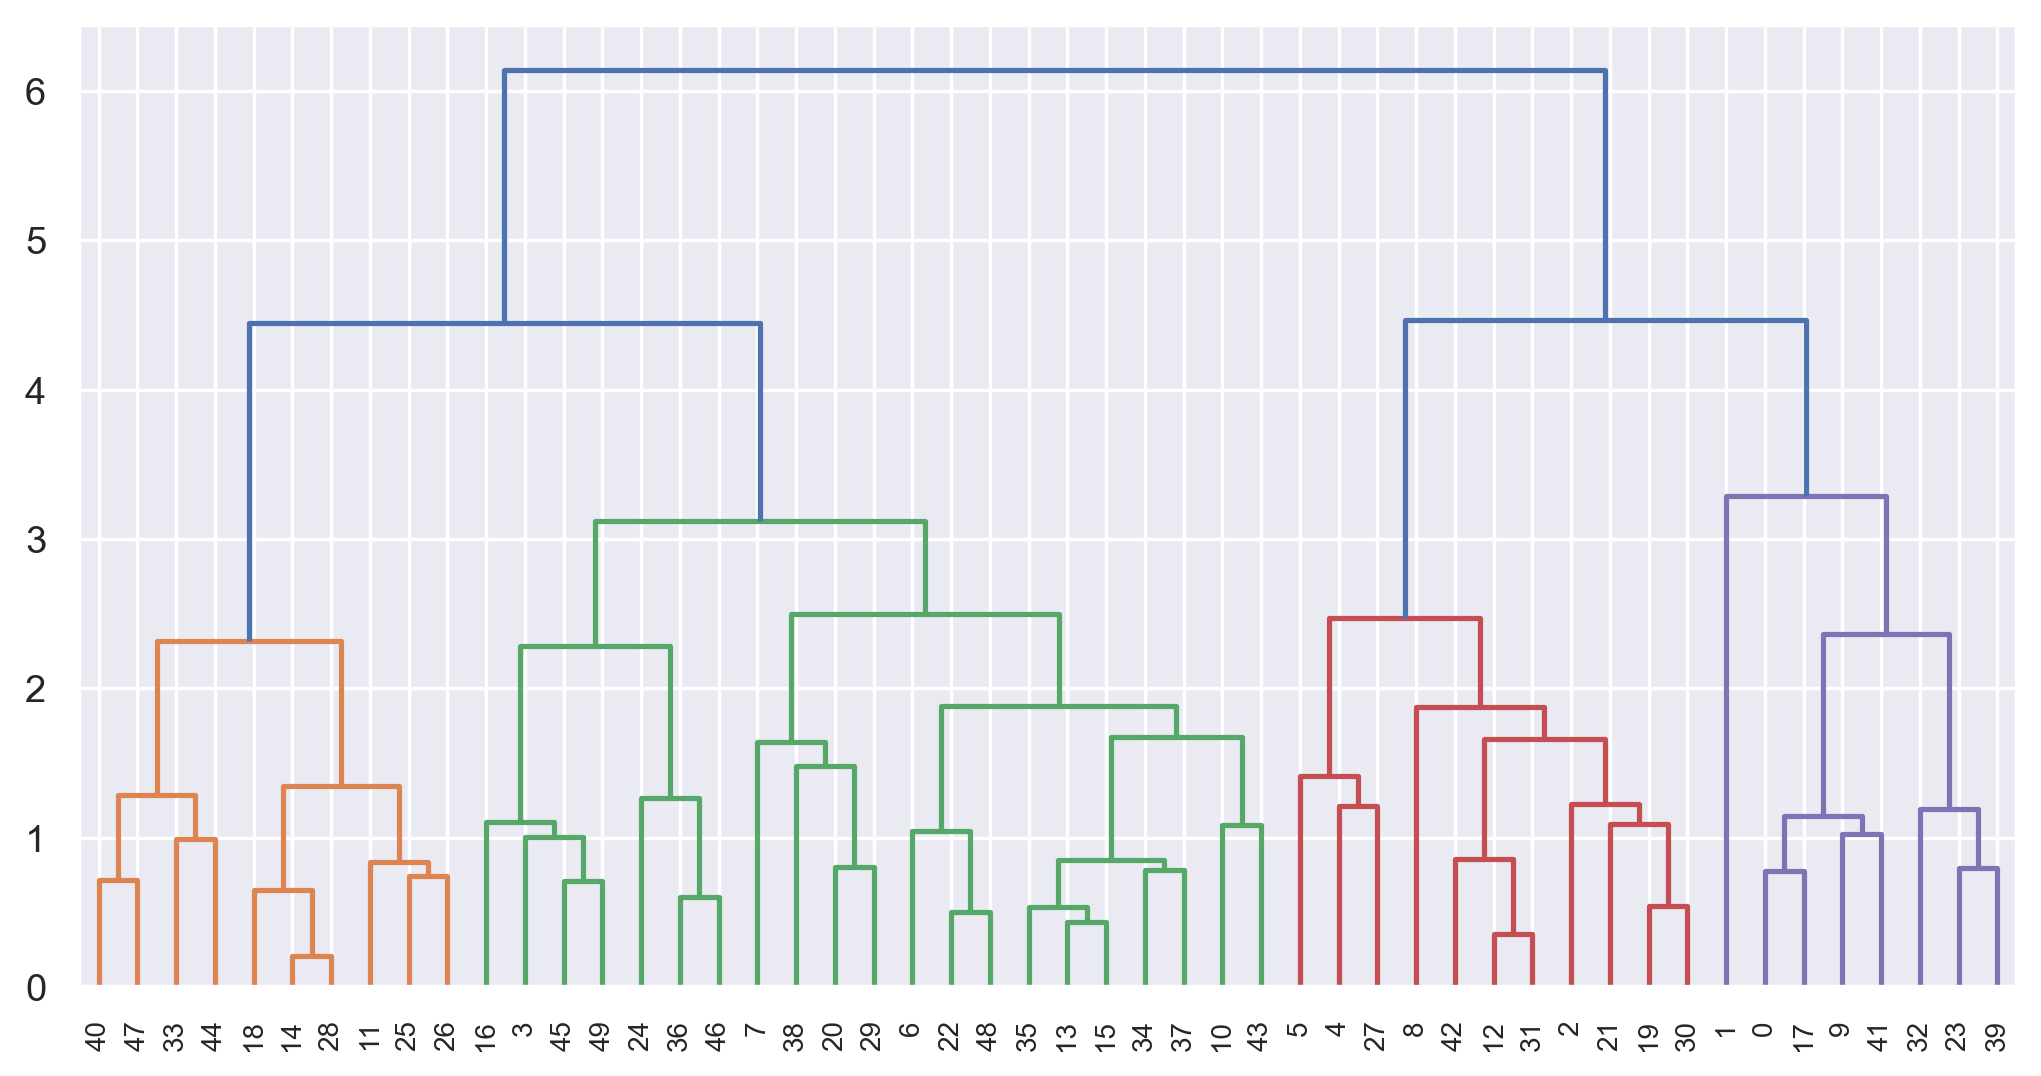

In [12]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 7, linestyle = '--', color = 'red')

# Model Building

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
hc = AgglomerativeClustering(n_clusters=2)

ypred = hc.fit_predict(x)
ypred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [16]:
df['cluster'] = ypred
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [17]:
df[df['cluster']==0].mean()

Murder        5.003226
Assault     116.483871
UrbanPop     63.838710
Rape         16.338710
cluster       0.000000
dtype: float64

In [18]:
df[df['cluster'] == 1]

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1
12,10.4,249,83,24.0,1
17,15.4,249,66,22.2,1
19,11.3,300,67,27.8,1


In [ ]:
#Analyzing the clusters

In [20]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.003226,116.483871,63.838710,16.338710
1,12.331579,259.315789,68.315789,29.215789


# 4 Cluster

In [21]:
hc = AgglomerativeClustering(n_clusters=4)
yp = hc.fit_predict(x)
yp

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [23]:
df=pd.read_csv("C:\\Users\\Pritee\\OneDrive\\Documents\\data science assignments\\assignments\\clustering\\crime_data.csv")
df['Cluster'] = yp
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [28]:
# Identify columns with 'object' data type
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to numeric type if possible
df[object_columns] = df[object_columns].apply(pd.to_numeric, errors='coerce')


In [30]:
# Group by 'Cluster' and calculate the mean
df.groupby('Cluster').mean()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Cluster,,,,,
0,NaN,6.210526,142.052632,71.263158,19.184211
1,NaN,10.966667,264.000000,76.500000,33.608333
2,NaN,3.091667,76.000000,52.083333,11.833333
3,NaN,14.671429,251.285714,54.285714,21.685714


<Axes: xlabel='Murder', ylabel='Rape'>

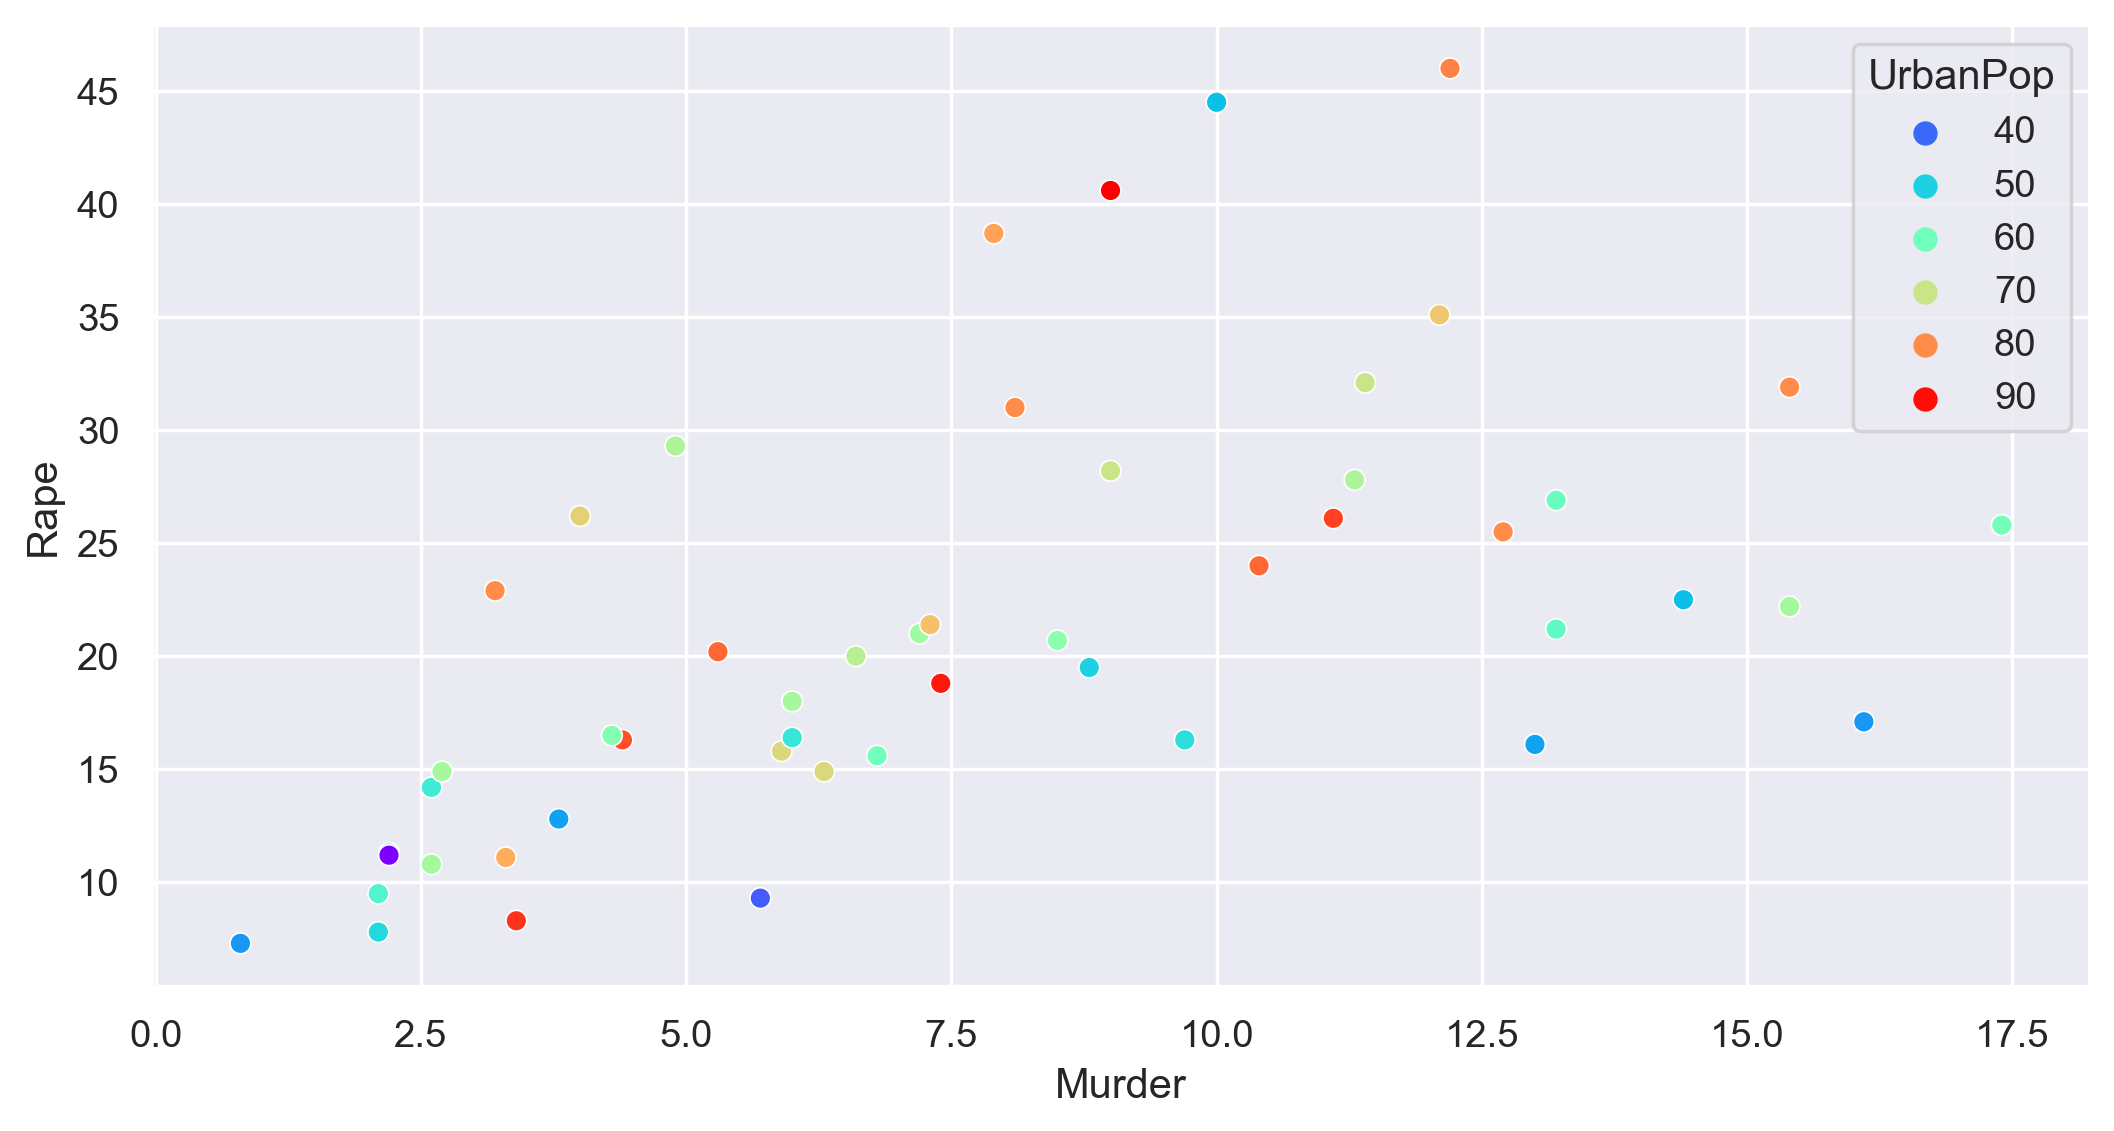

In [50]:
sns.scatterplot(x=df['Murder'], y=df['Rape'], hue=df['UrbanPop'], palette='rainbow')


In [43]:
from sklearn.metrics import silhouette_score

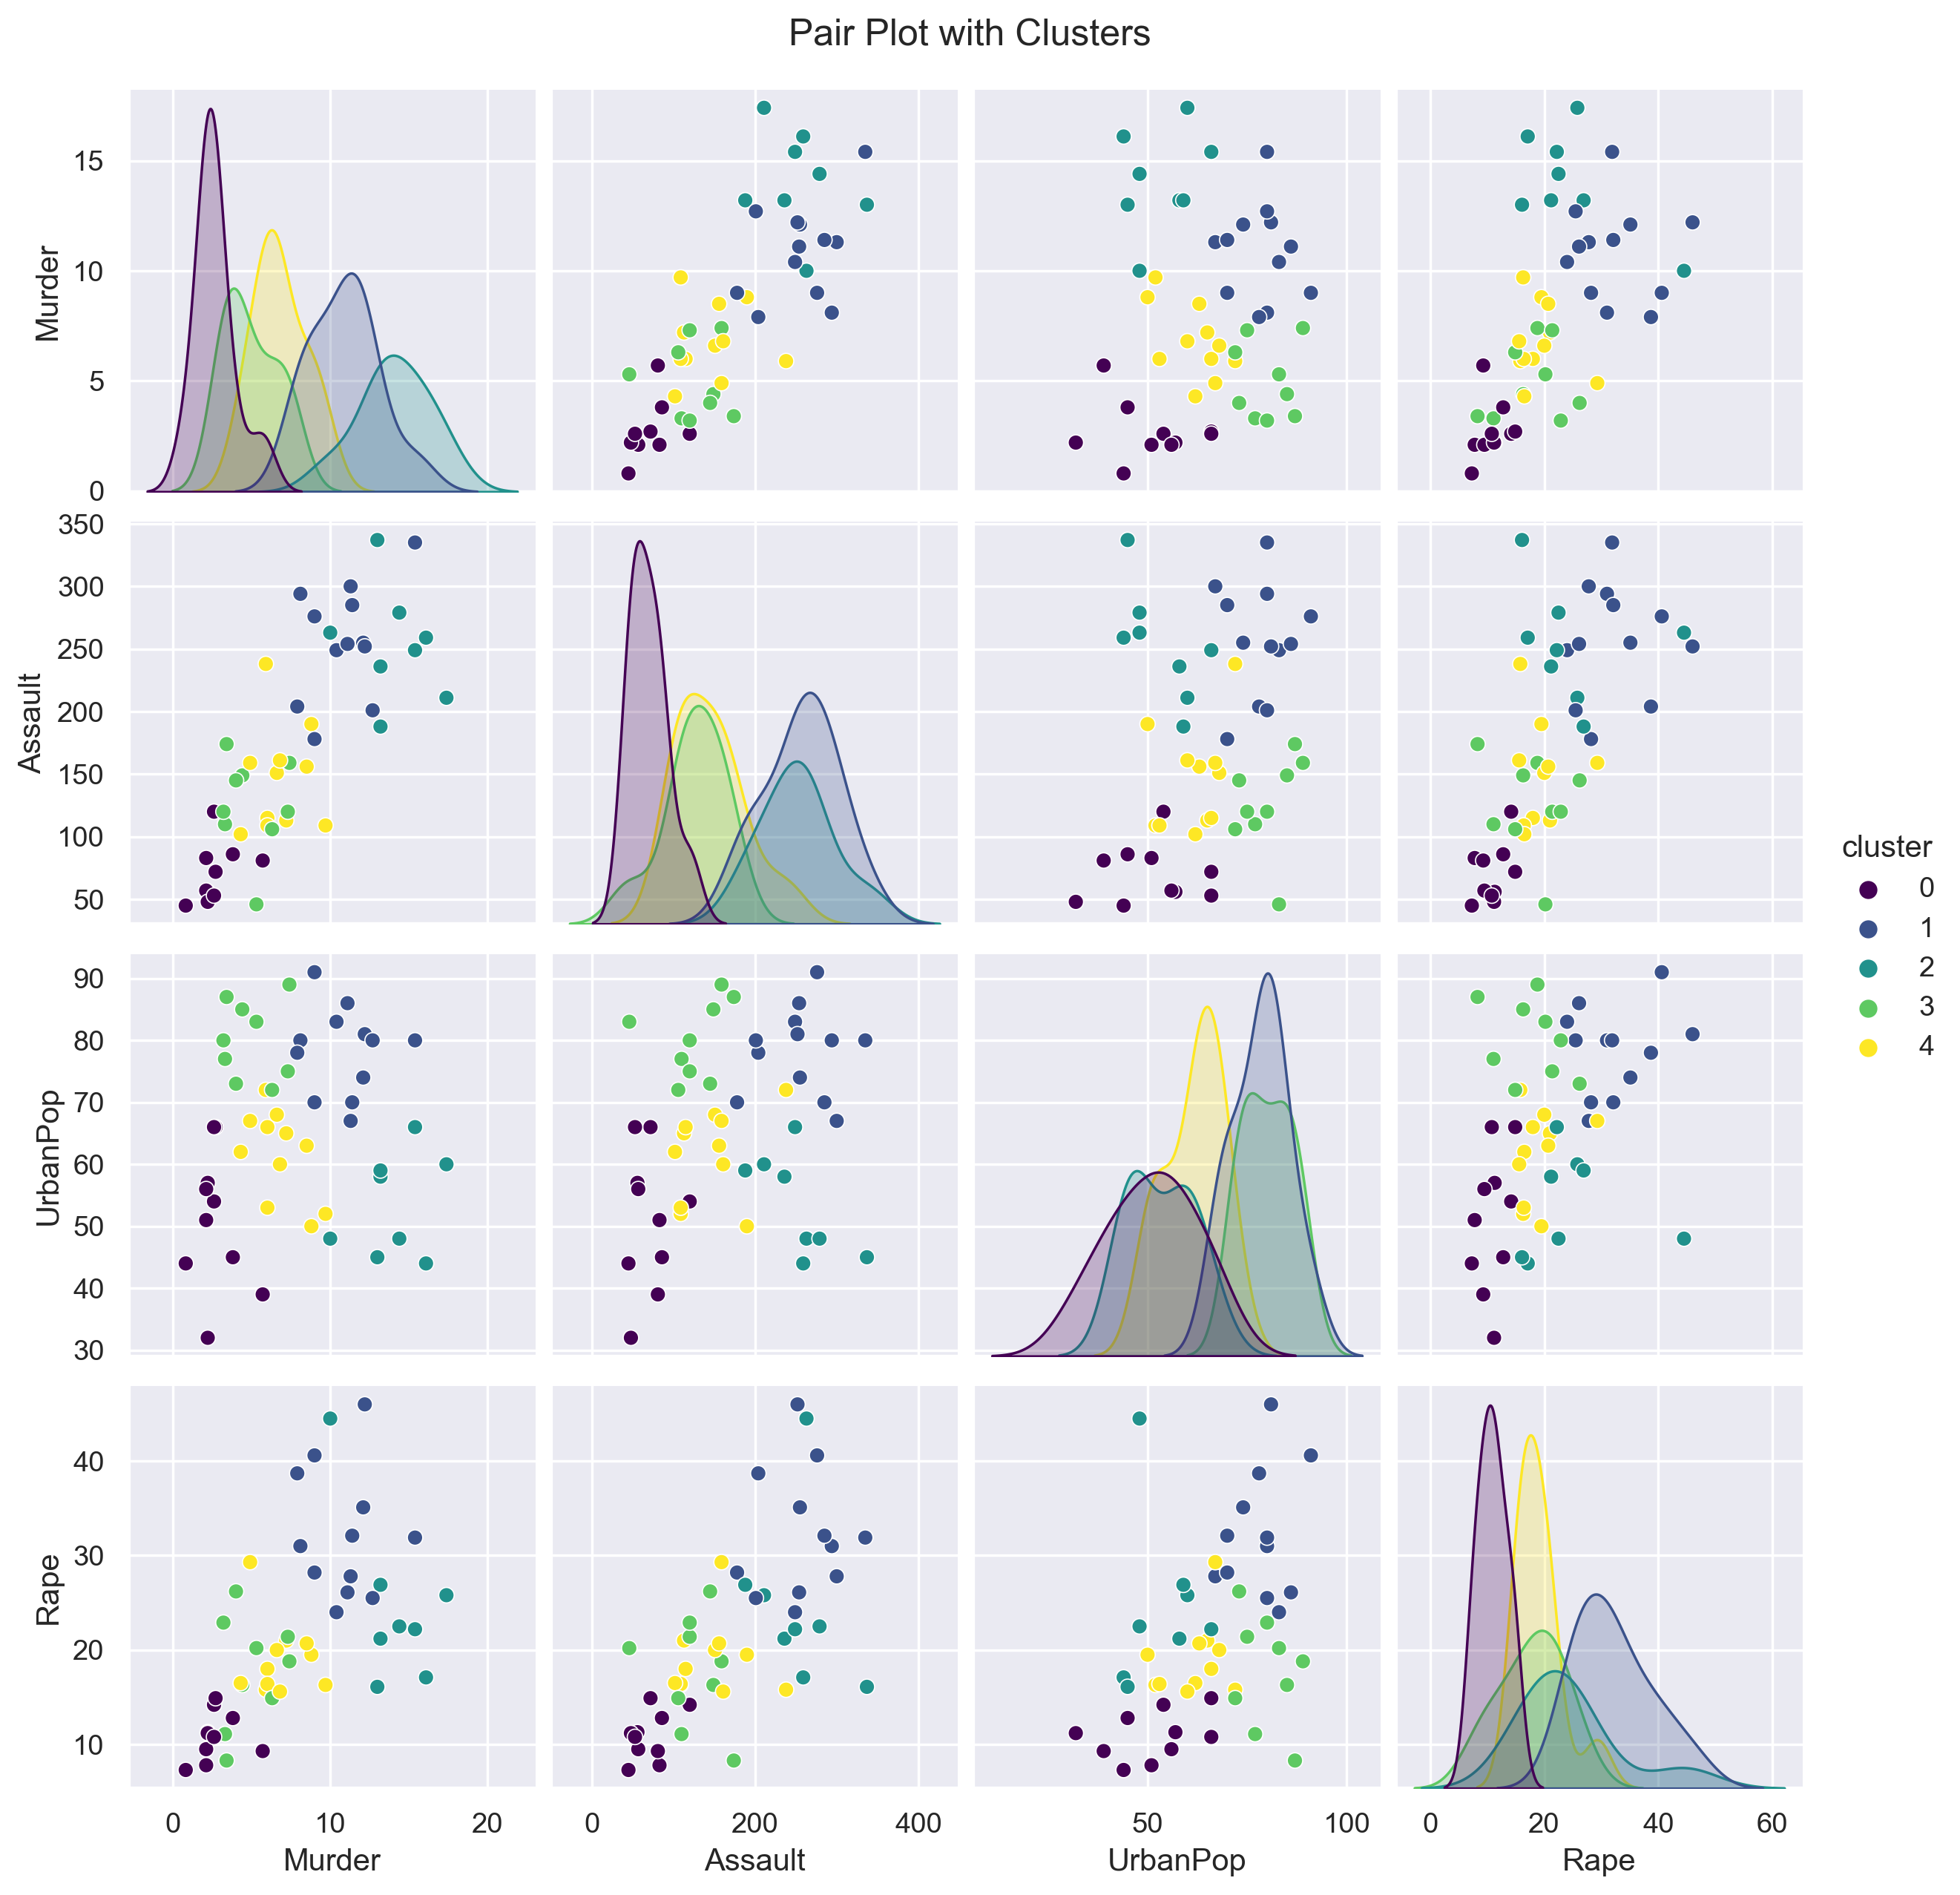

In [119]:
#Draw the inferences from the clusters obtained.
# Create a pair plot with hue as the cluster labels
sns.pairplot(df, hue='cluster', palette='viridis')
plt.suptitle('Pair Plot with Clusters', y=1.02)
plt.show()

In [1]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=49, centers=4, random_state=42)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the result
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.8029


# k-means clustering

In [3]:
df=pd.read_csv("C:\\Users\\Pritee\\OneDrive\\Documents\\data science assignments\\assignments\\clustering\\crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
# Drop the 'Unnamed: 0' column if it's not needed for clustering
df = df.drop(columns=['Unnamed: 0'])
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [5]:
# In this example, let's use 'Murder', 'Assault', 'Urban Pop', and 'Rape' as features
X = df[['Murder', 'Assault', 'UrbanPop', 'Rape']]


In [7]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 3 features based on ANOVA F-statistic
k_best = SelectKBest(f_classif, k=3)



In [9]:
X_selected = k_best.fit_transform(X_scaled, df['Rape']) 


In [10]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [12]:
#Model Building

In [13]:
from sklearn.cluster import KMeans

In [14]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [15]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([2, 7, 4, 6, 0, 0, 3, 3, 4, 2, 3, 1, 4, 6, 1, 6, 6, 2, 1, 4, 3, 4,
       1, 2, 6, 1, 1, 0, 1, 3, 4, 4, 2, 5, 6, 6, 6, 3, 3, 2, 5, 2, 4, 3,
       5, 6, 6, 5, 1, 6])

In [16]:
len(yp)

50

In [17]:
#cluster centre
km.cluster_centers_

array([[ 0.44344101,  0.88775677,  1.2417461 ,  2.21463743],
       [-1.09306354, -1.08193841, -0.51747175, -0.92286146],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.66980002, -0.40012085,  1.05273922, -0.56022015],
       [ 0.87540173,  1.22260495,  0.83465436,  0.85799046],
       [-1.08146728, -1.28193823, -1.78236392, -1.19517947],
       [-0.14480567, -0.31003829, -0.07575078,  0.02596213],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392]])

In [18]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [19]:
#Visualize the clusters
x[:,0]

array([ 1.25517927,  0.51301858,  0.07236067,  0.23470832,  0.28109336,
        0.02597562, -1.04088037, -0.43787481,  1.76541475,  2.22926518,
       -0.57702994, -1.20322802,  0.60578867, -0.13637203, -1.29599811,
       -0.41468229,  0.44344101,  1.76541475, -1.31919063,  0.81452136,
       -0.78576263,  1.00006153, -1.1800355 ,  1.9277624 ,  0.28109336,
       -0.41468229, -0.80895515,  1.02325405, -1.31919063, -0.08998698,
        0.83771388,  0.76813632,  1.20879423, -1.62069341, -0.11317951,
       -0.27552716, -0.66980002, -0.34510472, -1.01768785,  1.53348953,
       -0.92491776,  1.25517927,  1.13921666, -1.06407289, -1.29599811,
        0.16513075, -0.87853272, -0.48425985, -1.20322802, -0.22914211])

In [20]:
#Visualize the clusters
x[:,1]

array([ 0.79078716,  1.11805959,  1.49381682,  0.23321191,  1.2756352 ,
        0.40290872, -0.73648418,  0.81502956,  1.99078607,  0.48775713,
       -1.51224105, -0.61527217,  0.94836277, -0.70012057, -1.39102904,
       -0.67587817, -0.74860538,  0.94836277, -1.06375661,  1.56654403,
       -0.26375734,  1.02108998, -1.19708982,  1.06957478,  0.0877575 ,
       -0.74860538, -0.83345379,  0.98472638, -1.37890783, -0.14254532,
        1.38472601,  1.00896878,  2.01502847, -1.52436225, -0.61527217,
       -0.23951493, -0.14254532, -0.78496898,  0.03927269,  1.3119988 ,
       -1.027393  ,  0.20896951,  0.36654512, -0.61527217, -1.48799864,
       -0.17890893, -0.31224214, -1.08799901, -1.42739264, -0.11830292])

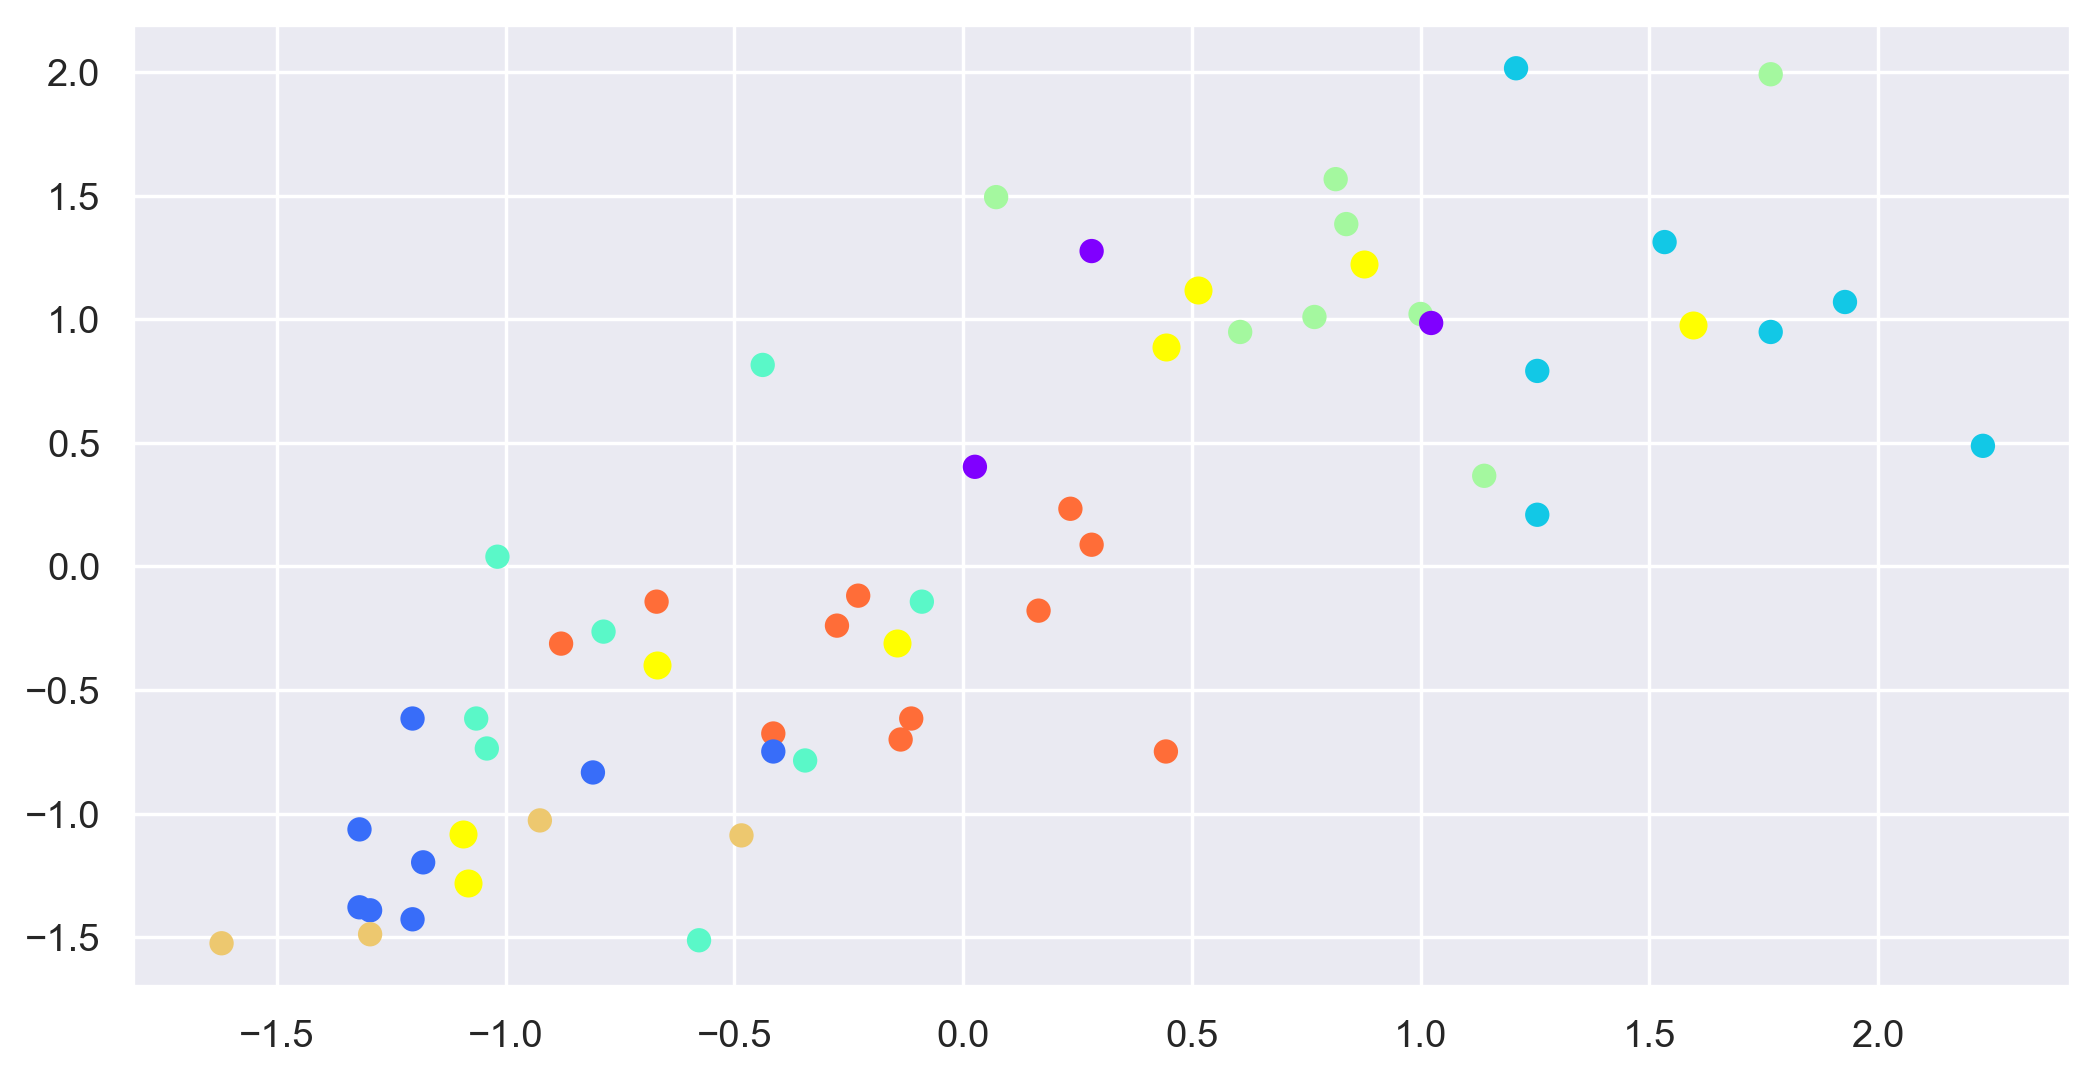

In [21]:
plt.scatter(x[:,0],x[:,1], c = yp, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 50)

In [22]:
km.inertia_

34.84537932120002

In [ ]:
#Elbow graph

In [23]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [24]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.32802224604082,
 44.52136573108119,
 40.37237864618049,
 34.68738839784909,
 31.58765012022205,
 28.66578646753262]

Text(0.5, 1.0, 'Elbow Graph')

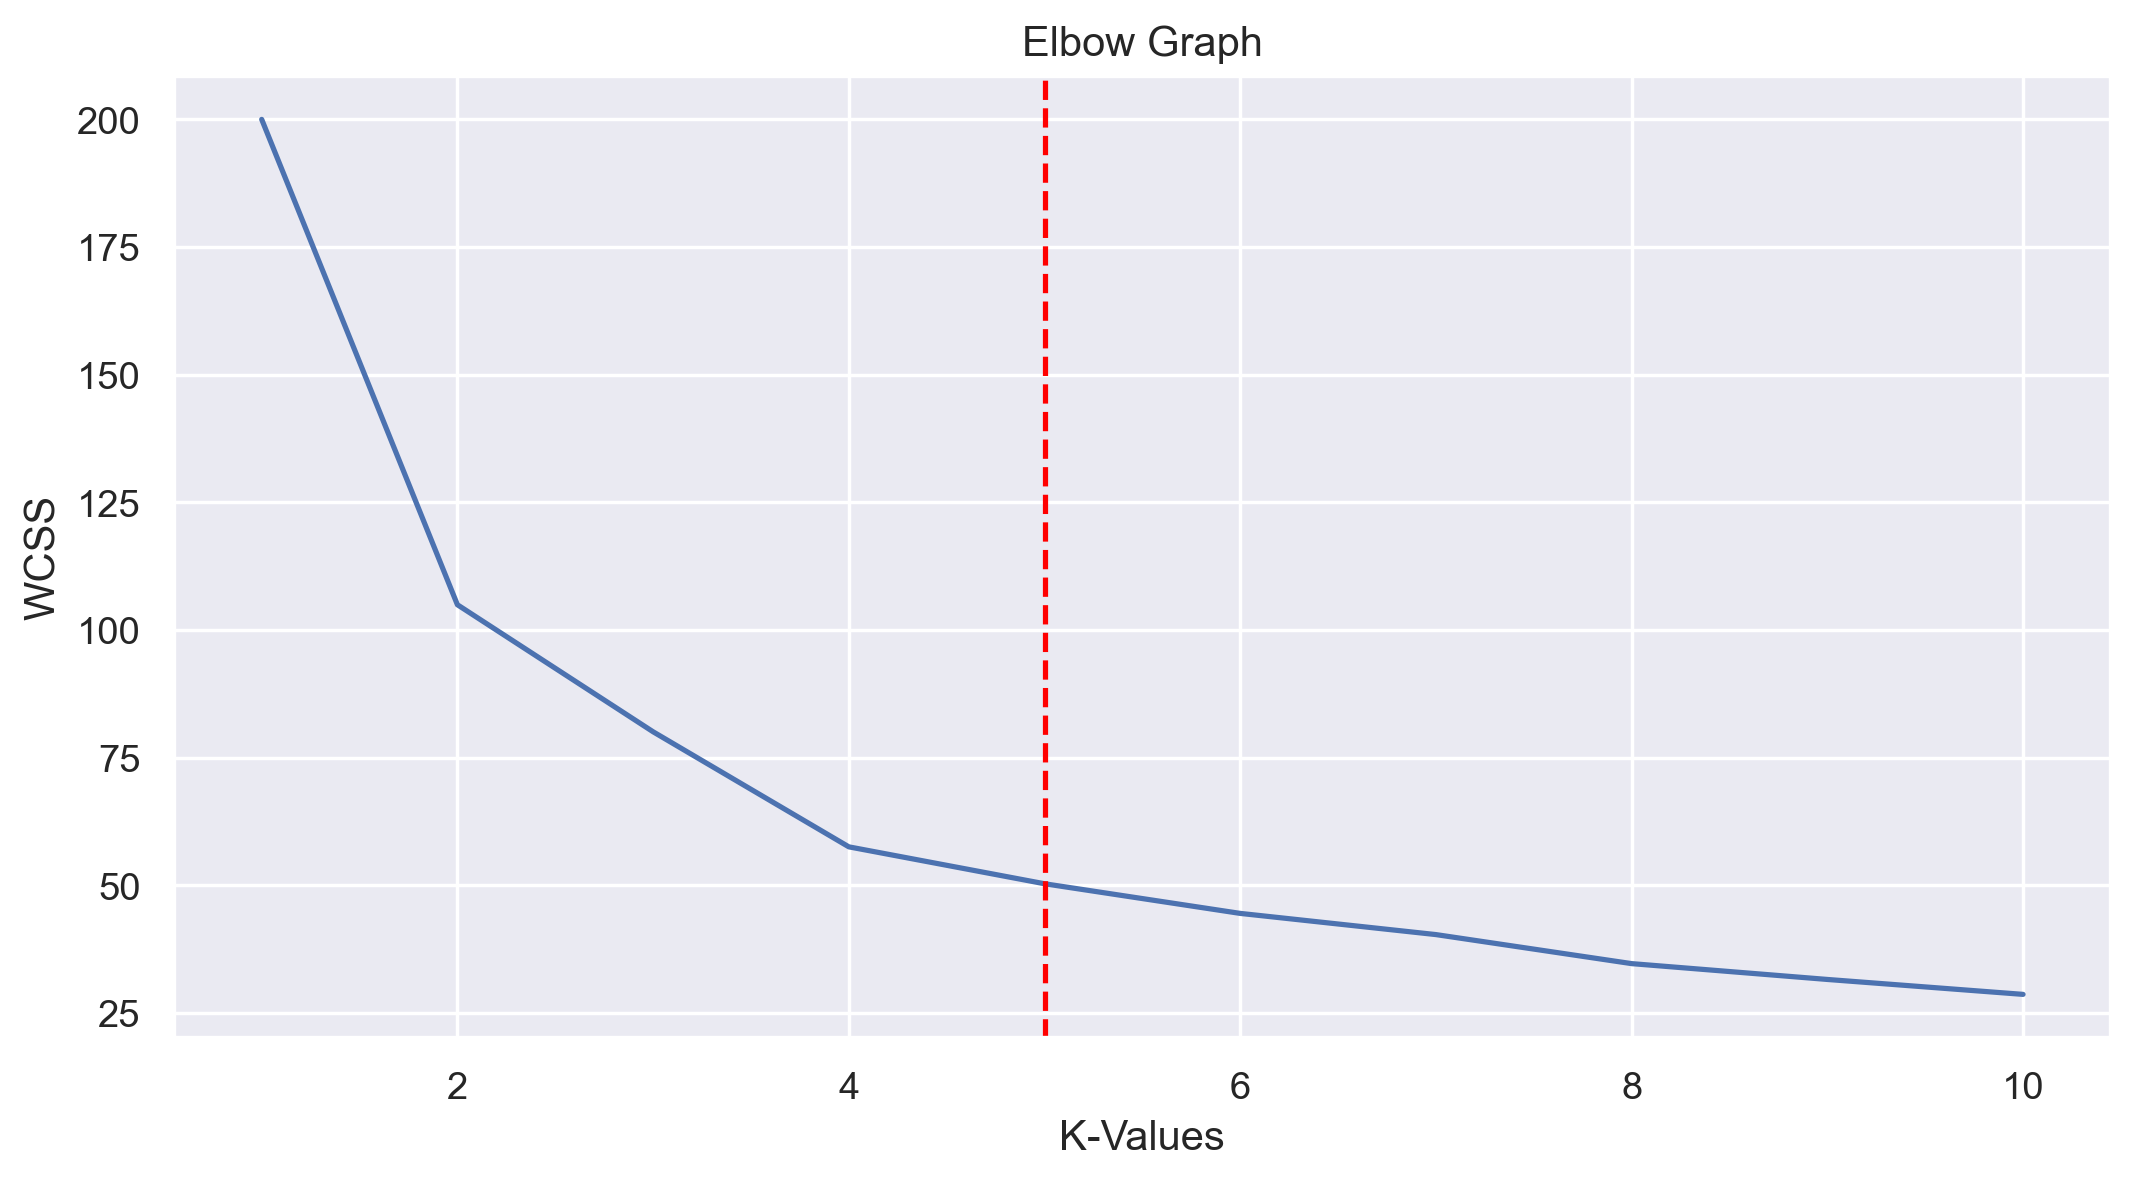

In [26]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 5, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [ ]:
#Final Model

In [27]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([3, 1, 1, 2, 1, 1, 0, 2, 1, 3, 0, 4, 1, 2, 4, 2, 2, 3, 4, 1, 0, 1,
       0, 3, 2, 2, 2, 1, 4, 0, 1, 1, 3, 4, 2, 2, 2, 0, 0, 3, 4, 3, 1, 0,
       4, 2, 2, 4, 0, 2])

In [28]:
#Visualize the clusters

In [29]:
km.cluster_centers_

array([[-0.8115321 , -0.73783098,  0.89281033, -0.63376699],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-0.23245533, -0.29838934, -0.10747222, -0.09512257],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-1.18293457, -1.19708982, -1.27640705, -1.16552107]])

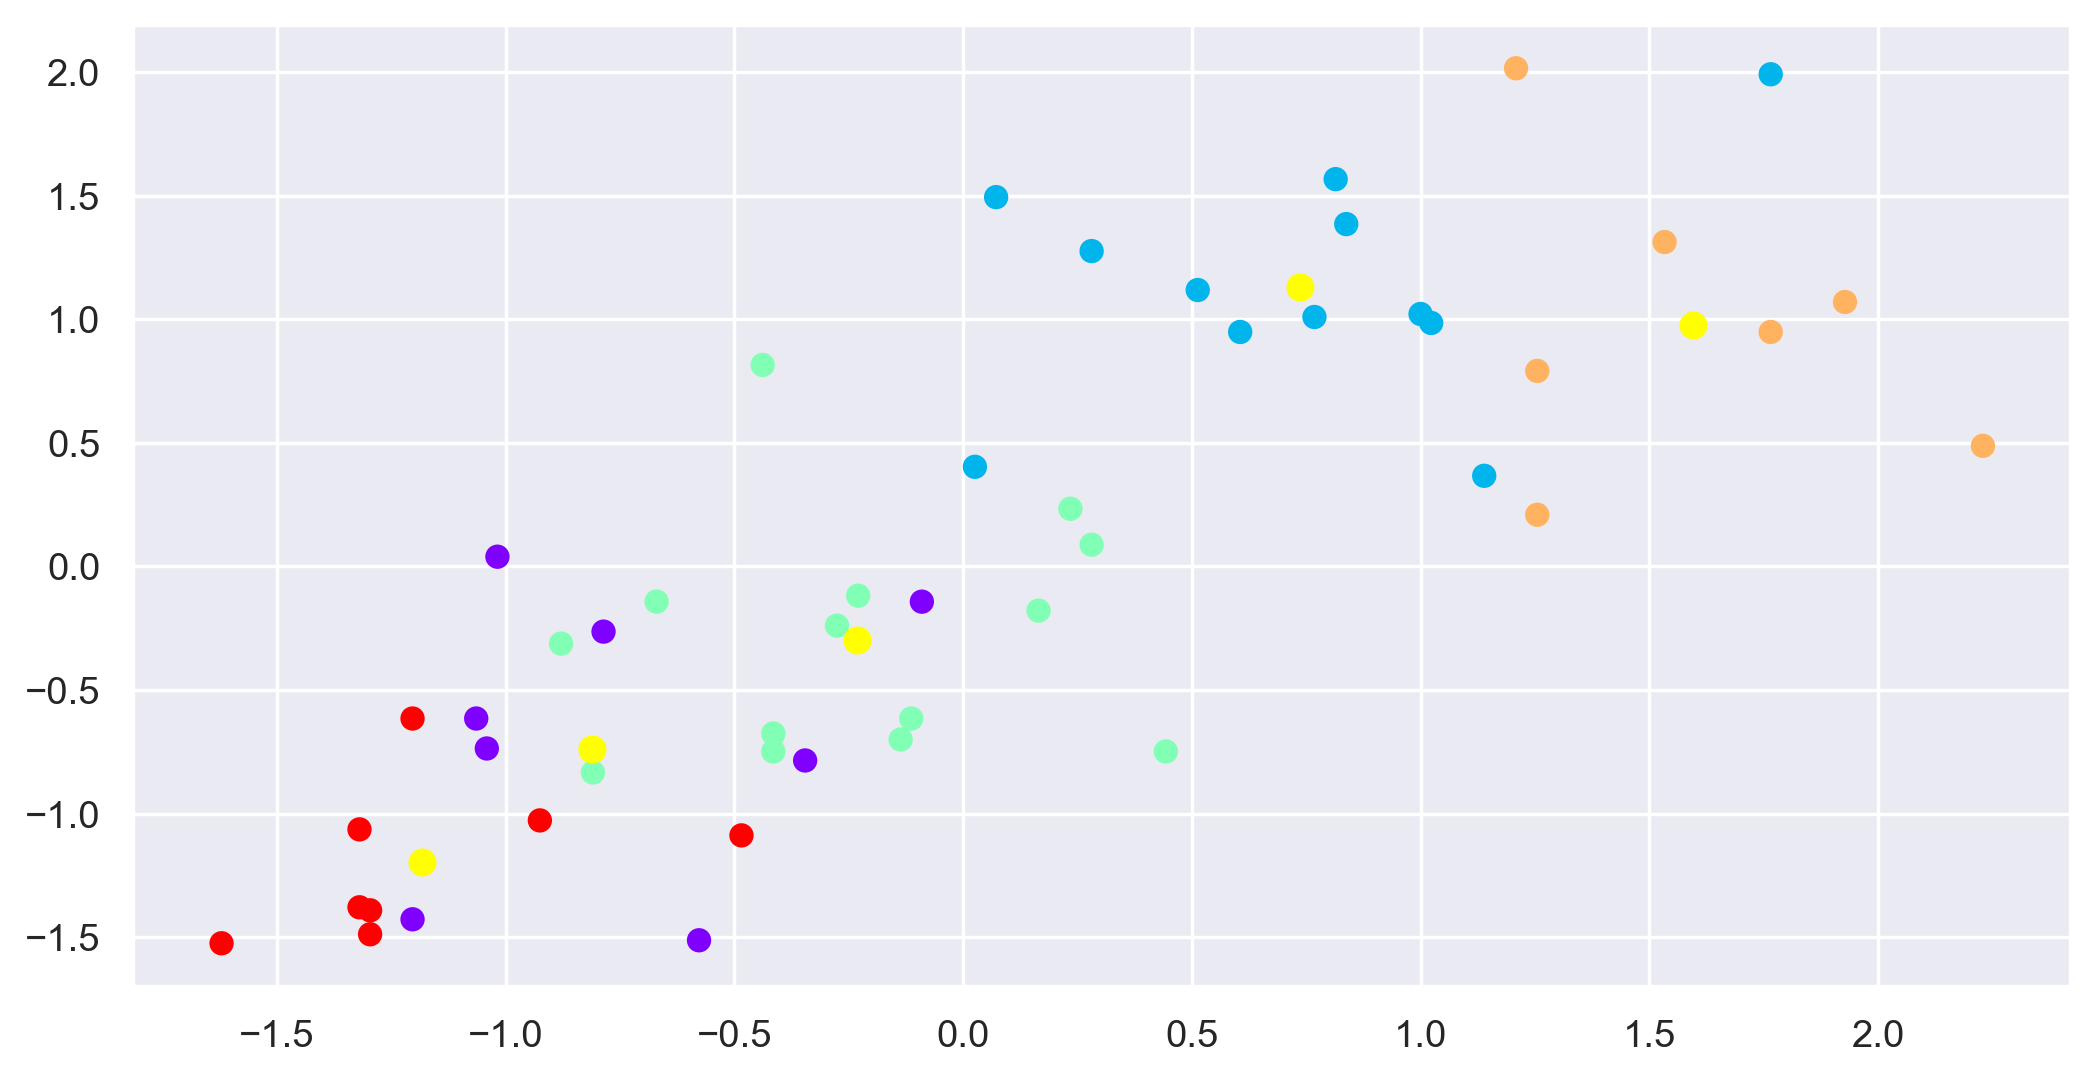

In [30]:
plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 50)

In [31]:
#Analyzing clusters
df['cluster'] = ypred
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [32]:
df[df['cluster'] == 0].mean()
df[df['cluster'] == 1].mean()

Murder       10.966667
Assault     264.000000
UrbanPop     76.500000
Rape         33.608333
cluster       1.000000
dtype: float64

In [33]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,4.288889,109.888889,78.333333,15.355556
1,10.966667,264.000000,76.500000,33.608333
2,6.785714,146.142857,64.000000,20.350000
3,14.671429,251.285714,54.285714,21.685714
4,2.687500,72.000000,47.250000,10.425000


In [34]:
df['cluster'].value_counts()

cluster
2    14
1    12
0     9
4     8
3     7
Name: count, dtype: int64

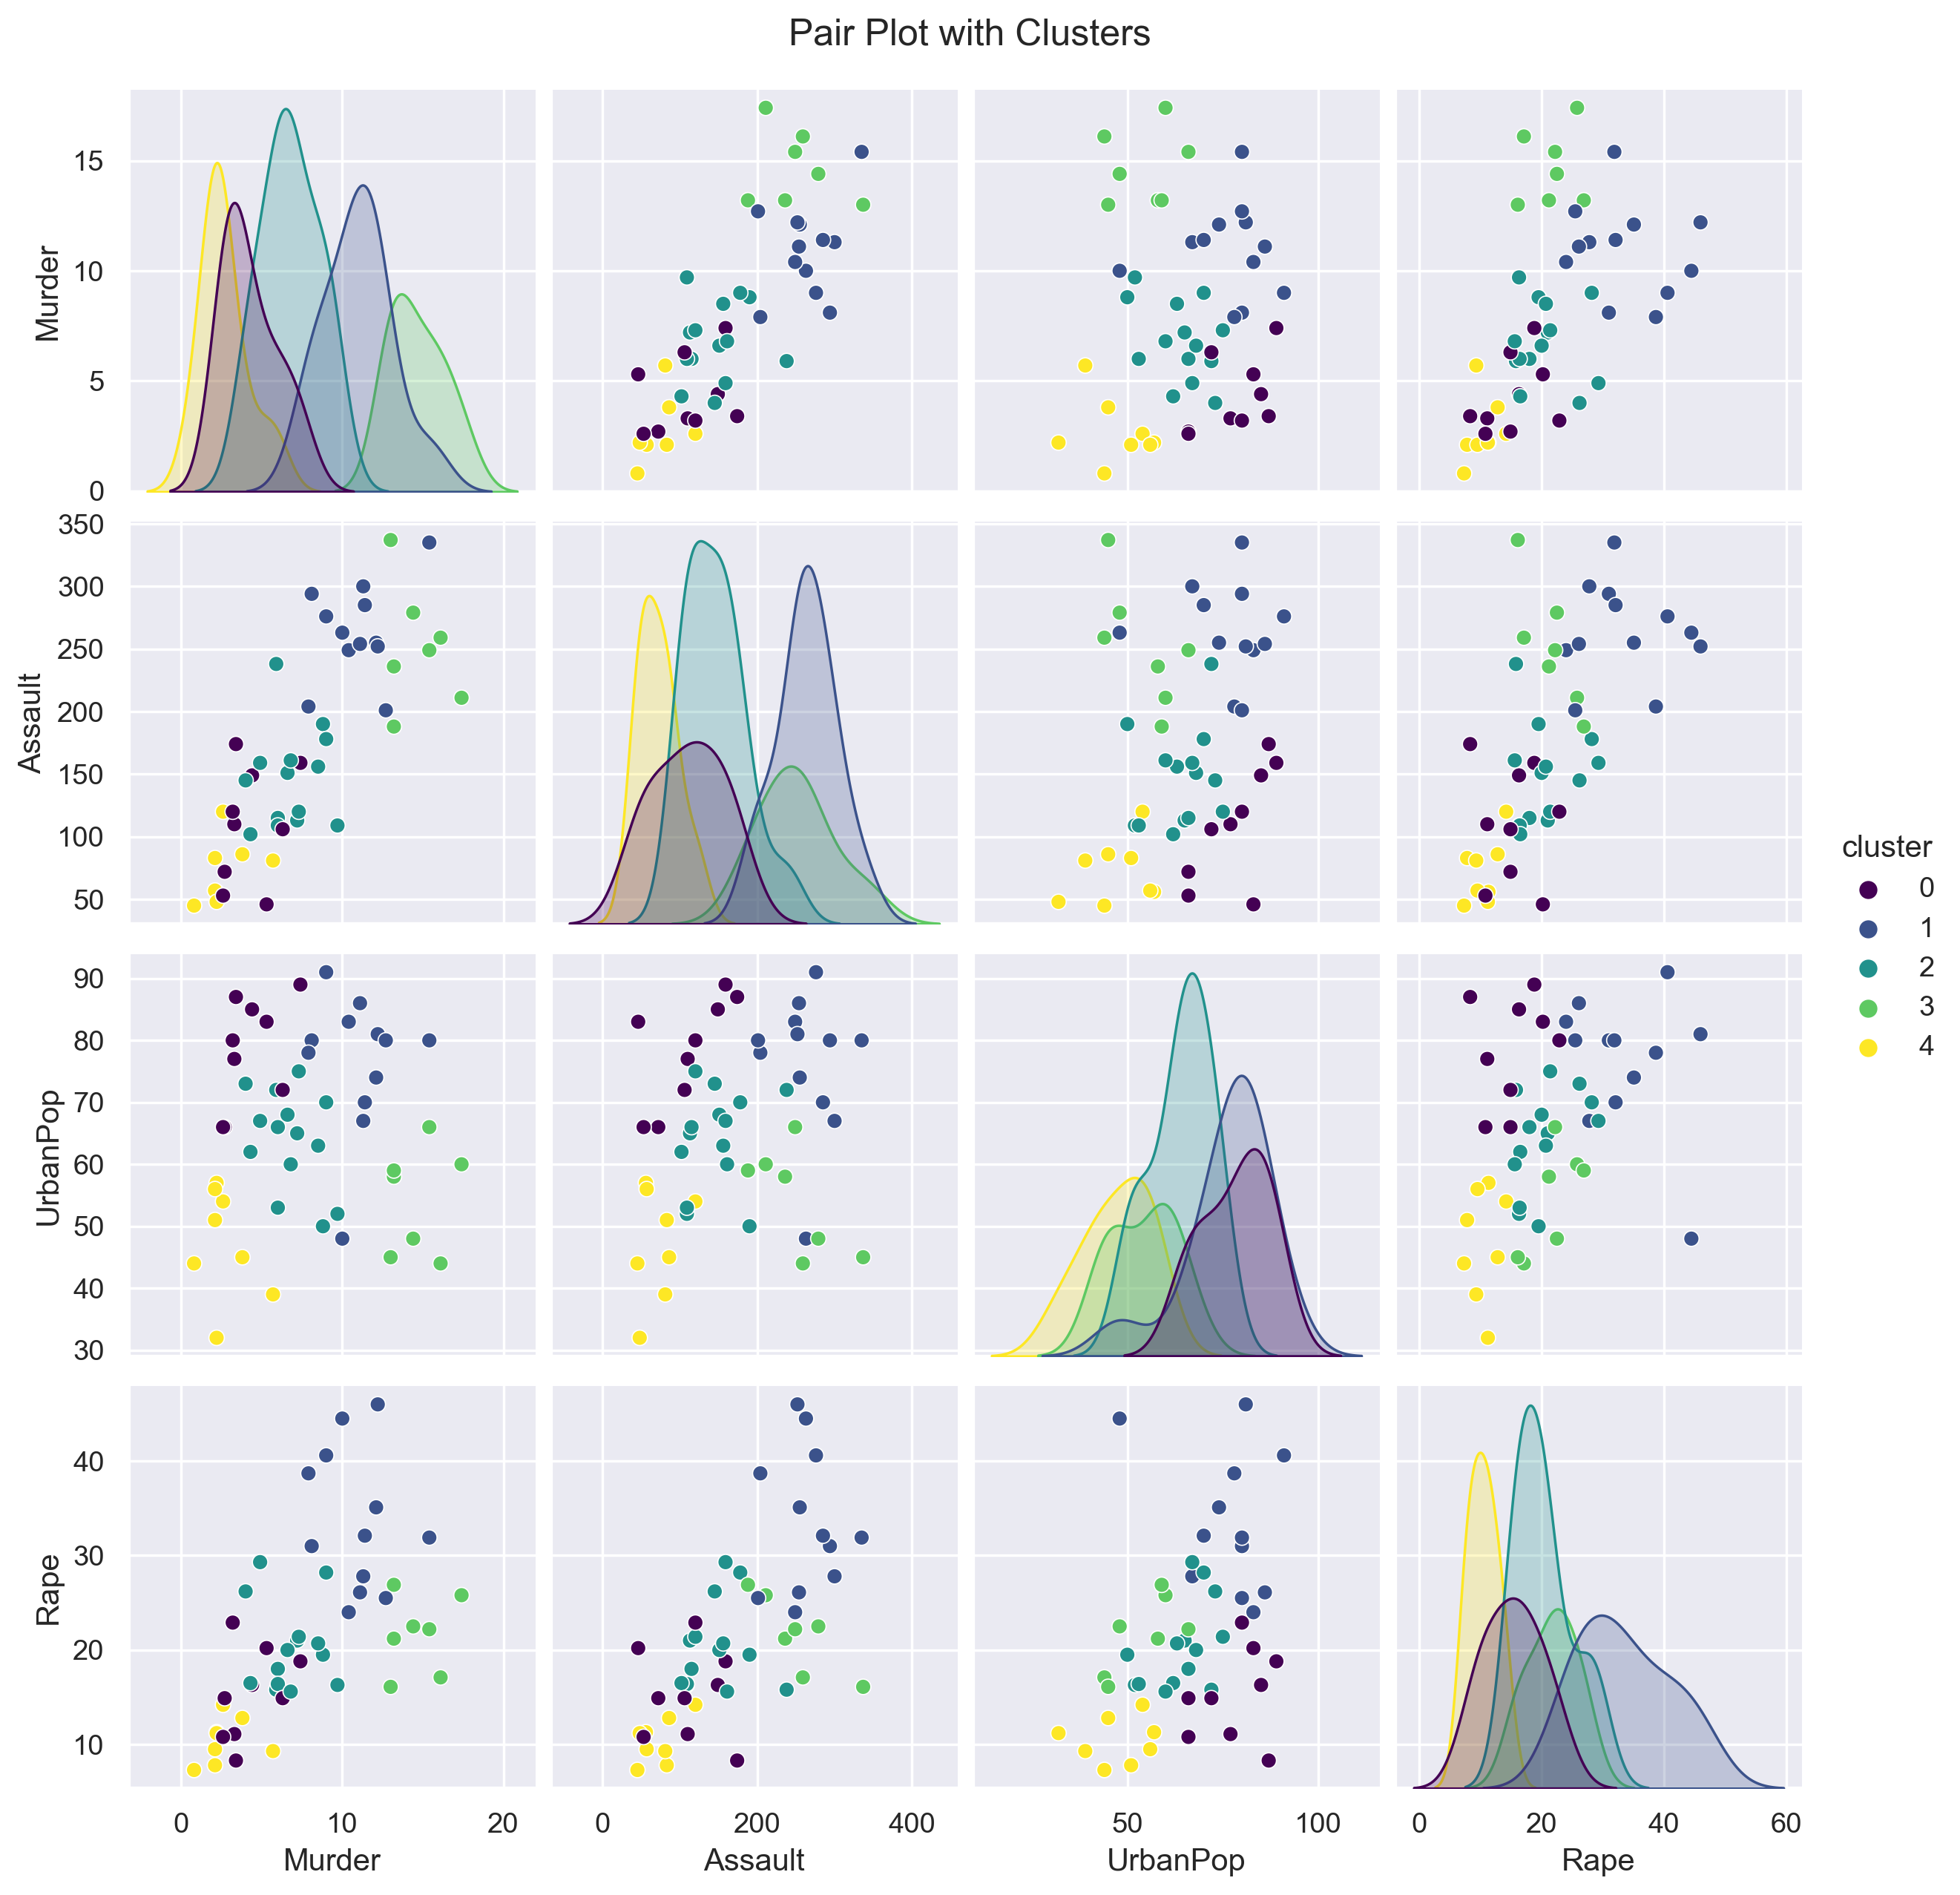

In [35]:
#Draw the inferences from the clusters obtained.
# Create a pair plot with hue as the cluster labels
sns.pairplot(df, hue='cluster', palette='viridis')
plt.suptitle('Pair Plot with Clusters', y=1.02)
plt.show()

In [36]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=50, centers=5, random_state=42)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the result
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.6688


In [37]:
from sklearn.metrics import adjusted_mutual_info_score


# Calculate Adjusted Mutual Information
ami = adjusted_mutual_info_score(yp, yp)

# Print the result
print(f'Adjusted Mutual Information: {ami:.4f}')


Adjusted Mutual Information: 1.0000


In [38]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Calculate homogeneity, completeness, and V-measure
homogeneity = homogeneity_score(yp, yp)
completeness = completeness_score(yp, yp)
v_measure = v_measure_score(yp, yp)

# Print the results
print(f'Homogeneity: {homogeneity:.4f}')
print(f'Completeness: {completeness:.4f}')
print(f'V-measure: {v_measure:.4f}')


Homogeneity: 1.0000
Completeness: 1.0000
V-measure: 1.0000


In [39]:
from sklearn.metrics import davies_bouldin_score


# Example data (replace these with your actual data)
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=49, centers=3, random_state=42)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, labels)

# Print the result
print(f'Davies-Bouldin Index: {db_index:.4f}')


Davies-Bouldin Index: 0.2052


In [40]:
from sklearn.metrics import calinski_harabasz_score

# Assuming X is your data and labels is the predicted cluster labels
# Replace X and labels with your actual data

# Example data (replace these with your actual data)
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=49, centers=3, random_state=42)

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, labels)

# Print the result
print(f'Calinski-Harabasz Index: {ch_index:.4f}')


Calinski-Harabasz Index: 935.0559
